Import Libraries and Set Up

In [ ]:
import cv2
from pyzbar.pyzbar import decode
from google.colab import files
from IPython.display import display, Image
import requests
import json

# Function to display the uploaded image
def display_uploaded_image(uploaded_file):
    display(Image(uploaded_file['content']))

Upload and Process the Image

Saving barcodeImage.png to barcodeImage.png


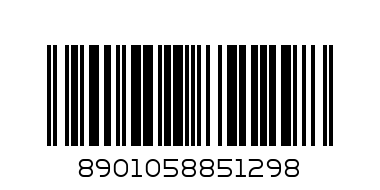

Decoded Barcode: 8901058851298


In [ ]:
# Upload image containing a barcode
uploaded = files.upload()

# Get the first uploaded file
for filename in uploaded.keys():
    image_path = filename
    display_uploaded_image({'content': uploaded[filename]})

# Read and decode the barcode from the image
def decode_barcode(image_path):
    img = cv2.imread(image_path)
    if img is None:
        print("Error: Could not load image.")
        return None
    decoded_objects = decode(img)
    if decoded_objects:
        for obj in decoded_objects:
            barcode_data = obj.data.decode('utf-8')
            print(f"Decoded Barcode: {barcode_data}")
            return barcode_data
    else:
        print("No barcode detected in the image.")
        return None

barcode = decode_barcode(image_path)

Fetch Data, Extract Ingredients, and Evaluate Health

In [ ]:
# Define a simple health evaluation dictionary
health_criteria = {
    'unhealthy': ['sugar', 'salt', 'sodium', 'artificial flavor', 'preservative', 'trans fat', 'hydrogenated oil'],
    'allergens': ['gluten', 'peanuts', 'nuts', 'dairy', 'soy', 'egg'],
    'healthy': ['vitamin', 'fiber', 'protein', 'omega-3', 'antioxidant']
}

def evaluate_health(ingredients_text):
    if not ingredients_text or ingredients_text == 'No ingredients available':
        return "Health evaluation unavailable due to missing ingredients data."

    ingredients_list = ingredients_text.lower().split(', ')
    health_status = []

    for ingredient in ingredients_list:
        if any(unhealthy in ingredient for unhealthy in health_criteria['unhealthy']):
            health_status.append(f"{ingredient} may be unhealthy (e.g., high sugar, salt, or additives).")
        if any(allergen in ingredient for allergen in health_criteria['allergens']):
            health_status.append(f"{ingredient} is a common allergen (e.g., gluten, nuts).")
        if any(healthy in ingredient for healthy in health_criteria['healthy']):
            health_status.append(f"{ingredient} is considered healthy (e.g., rich in vitamins, fiber).")

    if not health_status:
        return "No specific health concerns or benefits identified based on available data."
    return "\n".join(health_status)

def fetch_product_data(barcode):
    if barcode:
        url = f"https://world.openfoodfacts.org/api/v0/product/{barcode}.json"
        response = requests.get(url)
        if response.status_code == 200:
            data = response.json()
            if data.get('product'):
                product_name = data['product'].get('product_name', 'No name available')
                status = data.get('status', 'Unknown')
                ingredients = data['product'].get('ingredients_text', 'No ingredients available')
                health_evaluation = evaluate_health(ingredients)
                print(f"Product: {product_name} (Status: {status})")
                print(f"Ingredients: {ingredients}")
                print("Health Evaluation:")
                print(health_evaluation)
                return data
            else:
                print("Product not found in database.")
                return None
        else:
            print(f"Error fetching data: Status code {response.status_code}")
            return None
    return None

if barcode:
    product_data = fetch_product_data(barcode)

Product: Maggi 2-minutes Noodles (Status: 1)
Ingredients: Noodles : Refined wheat flour, Palm oil , salt , Wheat gluten , Thickeners(508 & 412) ,  mineral(calcium carbonate) and Humectant(451(i))
Taste maker : Hydrolyzed peanut protein ,Mixed spices(23.6%) ,Dehydrated onion , coriander powder , red Chili powder (3%), Turmeric powder , dried Garlic (2.5%), Cumin powder , Aniseed powder , Fenugreek powder , ginger powder , black pepper powder (0.4%), Clove powder(0.1%), green cardamom powder(0.1%), nutmeg powder  , Noodle powder ( refined wheat flour, palm oil ,wheat gluten ,Acid regulators(170(i) , 501(i) & 500(i)) , Thickeners(508 & 412) , Humectant(451(i)) , calcium carbonate, guar gum), starch, garlic powder, caramel salt mix (salt , color(150d), & palm oil)  , acidity regulators(330 & 500(ii)) , Flavour enhancer(635) and mineral ( ferric pyrophosphate)
Health Evaluation:
salt  may be unhealthy (e.g., high sugar, salt, or additives).
wheat gluten  is a common allergen (e.g., gluten, 